- Explore train set only
- If train set is large, compute a exploring set

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%store -r start_train_set
%store -r start_test_set
%store -r housing_data_pd
housing_data_pd = housing_data_pd
start_train_set = start_train_set
start_test_set = start_test_set

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

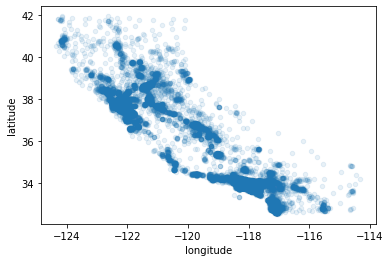

In [7]:
# alpha to adjust the transparency in a graph plot
housing_data_pd.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

In [8]:
housing_data_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


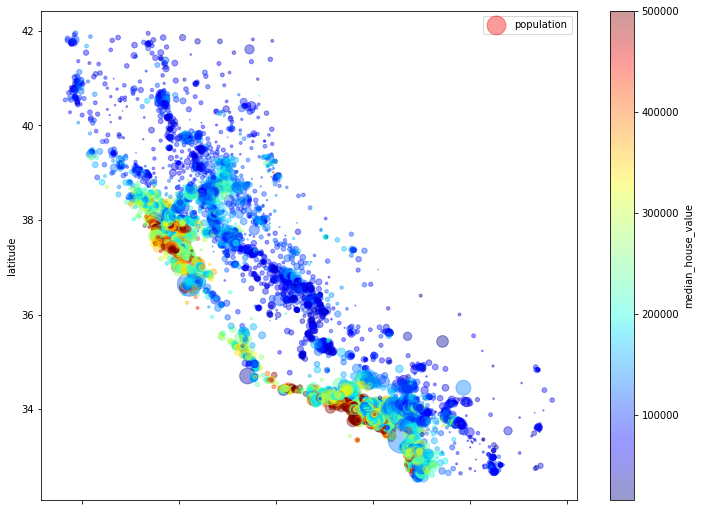

In [9]:
# housing_data_pd.plot.scatter == housing_data_pd.plot(kind='scatter')
# s: radius of a point in the scatter plot
# c: color of the point based on the value in a scatter point
# cmap: color map
# source: https://matplotlib.org/stable/index.html
housing_data_pd.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing_data_pd['population'] / 50,
                     label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
                     figsize=(12, 9))
plt.legend()

### You can calculate standard correlation coefficient between every pair of attributes using pd.corr()
We do this to know which column is correlated to which

In [10]:
# correlation values ranges between -1 and 1.
# correlation coefficient checks only linear relationship
corr_matrix = housing_data_pd.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


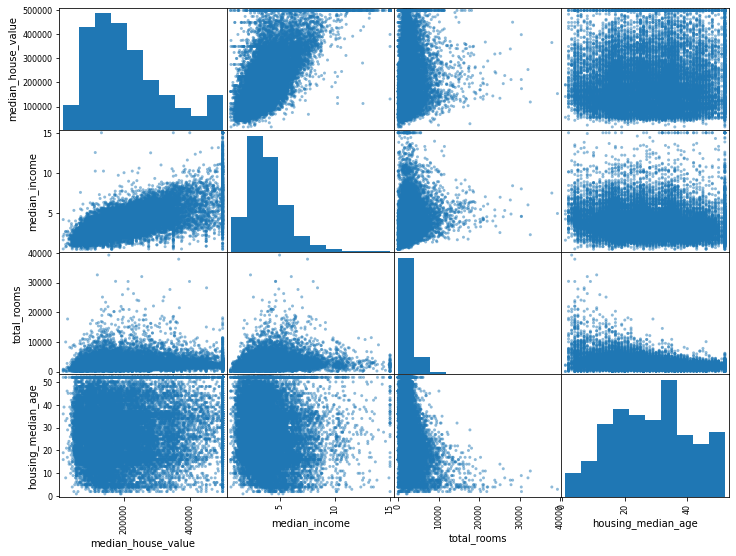

In [11]:
# pandas scatter_matrix is another way check the correlation between attributes
from pandas.plotting import scatter_matrix

# we will choose some attributes that we think they go together
attribs = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_data_pd[attribs], figsize=(12, 9))
plt.show()

It seems that the median income is the most promising attribute to be compared to. So, let's plot it

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

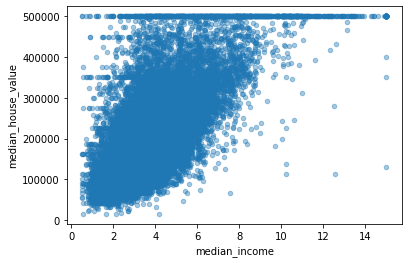

In [12]:
housing_data_pd.plot.scatter(x='median_income', y='median_house_value', alpha=0.4)

### Usually, combining attributes is more useful that using raw attributes

In [13]:
housing_data_pd['rooms_per_household'] = housing_data_pd['total_rooms'] / housing_data_pd['households']
housing_data_pd['bedrooms_per_rooms'] = housing_data_pd['total_bedrooms'] / housing_data_pd['total_rooms']
housing_data_pd['population_per_household'] = housing_data_pd['population'] / housing_data_pd['households']

In [14]:
# check the correlation with the new attributes
corr_matrix = housing_data_pd.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


In [16]:
# Separate predictors and labels
housing_data_pd = start_train_set.drop('median_house_value', axis=1)
housing_labels = start_train_set['median_house_value'].copy()
housing_data_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


# Data Cleaning

3 options to deal with missing data
- dropna: drops rows with null columns
- fillna: fill missing data
- drop: drop the whole columni

In [ ]:
# housing_data_pd.dropna(subset=['total_bedrooms'])
# housing_data_pd.drop('total_bedrooms', axis=1)
# median = housing_data_pd['total_bedrooms'].medain()
# when choosing option 3, we should put the same median to train set and test set
# housing_data_pd['total_bedrooms'].fillna(median, inplace=True)

### Or, you can use SimpleImputer by sikit_learn

In [17]:
# Or, you can use SimpleImputer by sikit_learn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
# this is used with numeric data only
housing_num = housing_data_pd.drop('ocean_proximity', axis=1)
imputer.fit(
    housing_num)  # calculates and saves the median of each value, nothing happened to data yet
# median of each attribute is saved in imputer.statistics_
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [18]:
housing_imputed = imputer.transform(housing_num)
#or
imputer.fit_transform(housing_num)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [19]:
# to transform this plain PD_DF:
housing_tr = pd.DataFrame(housing_imputed, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr  # All data are filled now with median of each column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## Handling Text

In [20]:
# Text to numbers
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
housing_ocean_col = housing_data_pd[['ocean_proximity']]
housing_ocean_col = ord_enc.fit_transform(housing_ocean_col)
housing_ocean_col[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [21]:
# The above one has an issue since the categories are not spread equally. Near ocean and <1h Ocean seems far from each other while they are almost the same
# We will use one-hot encoding
# one to show that this option is present and the others are absent
from sklearn.preprocessing import OneHotEncoder

one_hot_ecn = OneHotEncoder()
housing_ocean_col = housing_data_pd[['ocean_proximity']]
housing_ocean_col = one_hot_ecn.fit_transform(housing_ocean_col)
housing_ocean_col.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

One hot encoding is not a good choice if you have many categories. Instead of using it in this case
consider transforming the data to something numerical that's more representative

### To create a custom transformer
We do this to use to with other sklearn transformers and to use it with pipelines
create a class that inherits BaseEstimator and TransformerMixin and override
fit(), transform()

In [22]:
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:,population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms__per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms__per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


### Feature Scaling
- Machine learning usually doesn't perform well when the scales are different
- Two scaling methods:
    - min-max scaling (Normalization): range values between 0-1.
        - sklearn MinMaxScaler
        - value - min / (max - min)
    - standardization:
        - sklearn StandardScaler
        - value - mean / (standard deviation)
        - Doesn't work with NN
        - Less affected by outliers
- Fit Scalers to the training data only

### Pipelines
- Scikit-Learn provides the PipeLine class to help with transformation sequences.

In [24]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# names are user-defined (No underscore)
# things should be transformers, except the last one
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('srd_scalar', StandardScaler())
])

housing_num_tr = numeric_pipeline.fit_transform(housing_num)
housing_num_tr[:10]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  0.2512412 ,  0.00610923,
        -0.47451338],
       [-1.23109441,  1.08549869, -0.05196285, -0.66197687, -0.68632833,
        -0.62358295, -0.6521739 , -0.09422376, -0.24916496, -0.01928904,
        -0.075

One transformer to handle numeric data and other data:
### ColumnTransformer
### Here we combined everything we had done before in one pipline to make life easier.
### For the numeric data
1- Fill missing data with the mean values using the SimpleImputer
2- Combine some attributes to have a better data representation using CombinedAttributesTransformer
3- Scale the data using Standard Scalar
<br>
### For the textual data
- Using OneHotEncoder
<br>

### Notice that the ColumnTransformer applies the assigned transformer to a specific column

In [ ]:
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num) # list(pandas DF) will create a list of the header names
cat_attr = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    # name, transformer, list of columns names or indexes
    ('num', numeric_pipeline, num_attr),
    ('cat', OneHotEncoder(), cat_attr)
])
housing_prepared = full_pipeline.fit_transform(housing_data_pd)
# The column transformer estimates the density of the matrix automatically (ratio of nonzero cells)!

#### You can use FeatureUnion and apply multiple transformers if you use sklearn version 0.19 or earlier. But you can't apply different transformers to different colummns.

In [ ]:
%store housing_prepared
%store housing_labels
%store housing_data_pd
%store full_pipeline